# Visualizing nested sampling results

Code adapted from [this tutorial](https://dynesty.readthedocs.io/en/stable/quickstart.html#visualizing-results).

In [8]:
import os
import json
from dynesty import plotting as dyplot
from inference.sampling import NestedStrategy
%matplotlib inline

In [78]:
# Change path to output file
dirname = os.getcwd()
filename  = '../output.pickle'
output_filename = '../data/runs/H0,alpha,beta,c_strategy=nested_nevents=1000_nsteps=12000.json'
filepath = os.path.join(dirname, filename)
save_figures = False
figures_prefix = 'figures/nested_sampling/'

In [79]:
with open(output_filename, encoding='utf8') as f:
    summary = json.load(f)
summary

{'strategy': 'Nested Sampling',
 'prior': 'Uniform([20.  0.  0.  0.], [140.  10.  10.   4.])',
 'params': ['H0', 'alpha', 'beta', 'c'],
 'free_params': ['H0', 'alpha', 'beta', 'c'],
 'fixed_params': {},
 'truths': [70, 2.7, 2.9, 1.9],
 'plot_labels': ['$H_0$', '$\\alpha$', '$\\beta$', '$c$'],
 'free_params_plot_labels': ['$H_0$', '$\\alpha$', '$\\beta$', '$c$'],
 'samples_filepath': 'data/samples/4fb91e3c-7830-40e7-baf3-1fd4abead856.pickle',
 'sigma_dl': 0.1,
 'nevents': 200,
 'nwalkers': 32,
 'nsteps': 12000}

In [80]:
samples_filepath = '../' + summary.get('samples_filepath')
print(samples_filepath)
results = NestedStrategy.read_from_file(samples_filepath)
results.summary()

../data/samples/4fb91e3c-7830-40e7-baf3-1fd4abead856.pickle
Summary
niter: 12001
ncall: 91263
eff(%): 11.901
logz: -1545.375 +/-  0.029


## Trace plots

In [81]:
# Change labels to appropriate names
ndim = results.samples.shape[-1]
plot_labels = summary.get('free_params_plot_labels')

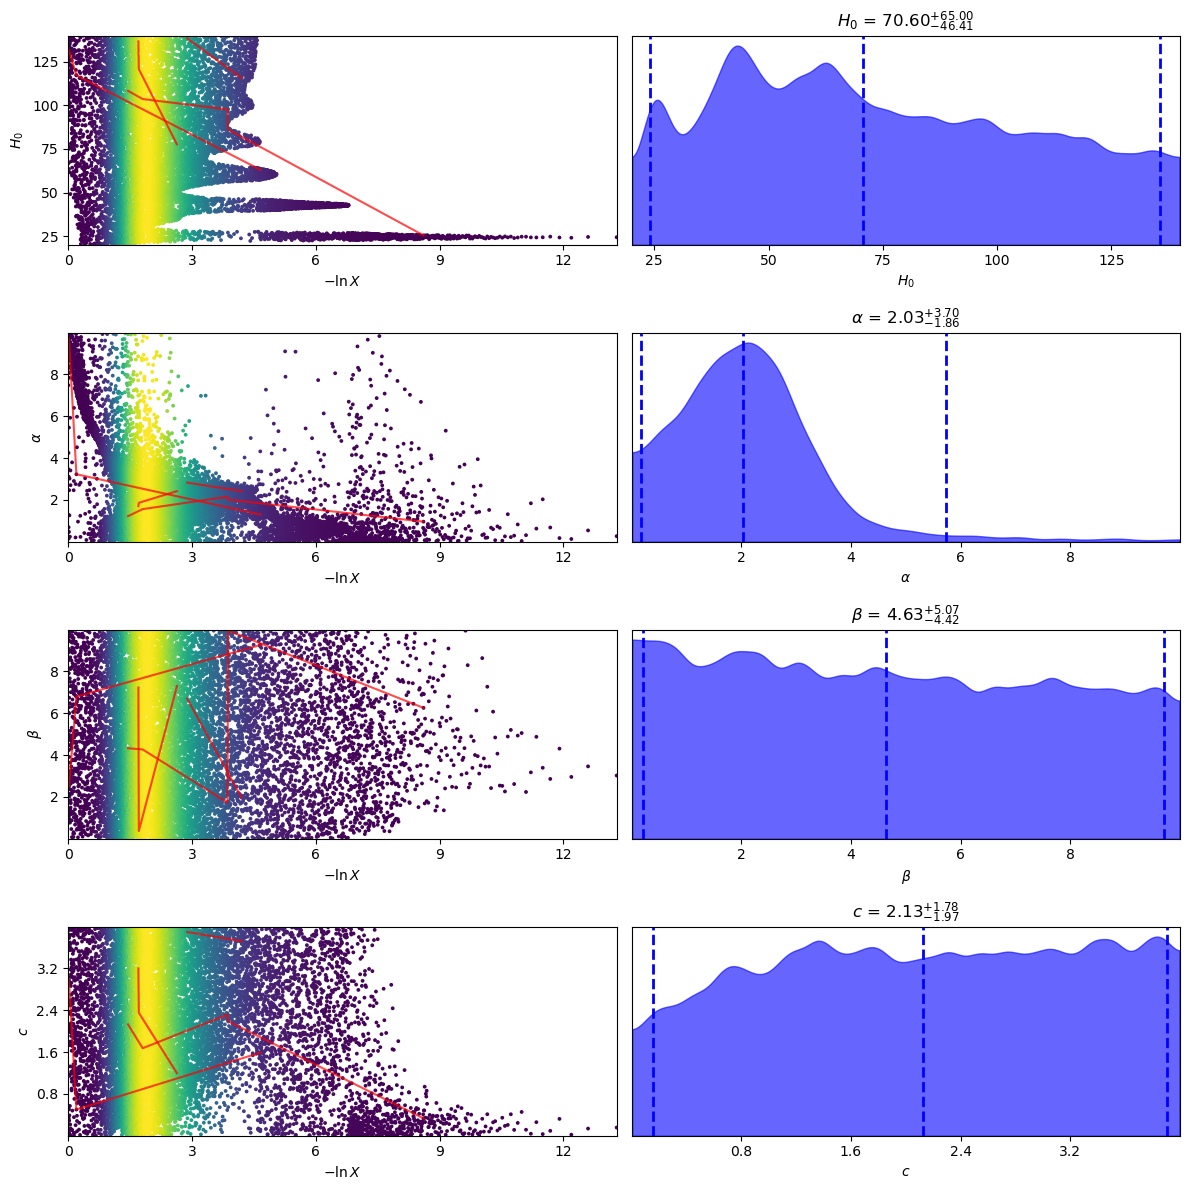

In [82]:
fig, ax = dyplot.traceplot(results, labels=plot_labels,
                             truth_color='black', show_titles=True,
                             trace_cmap='viridis', connect=True)
fig.tight_layout()

## Corner plots

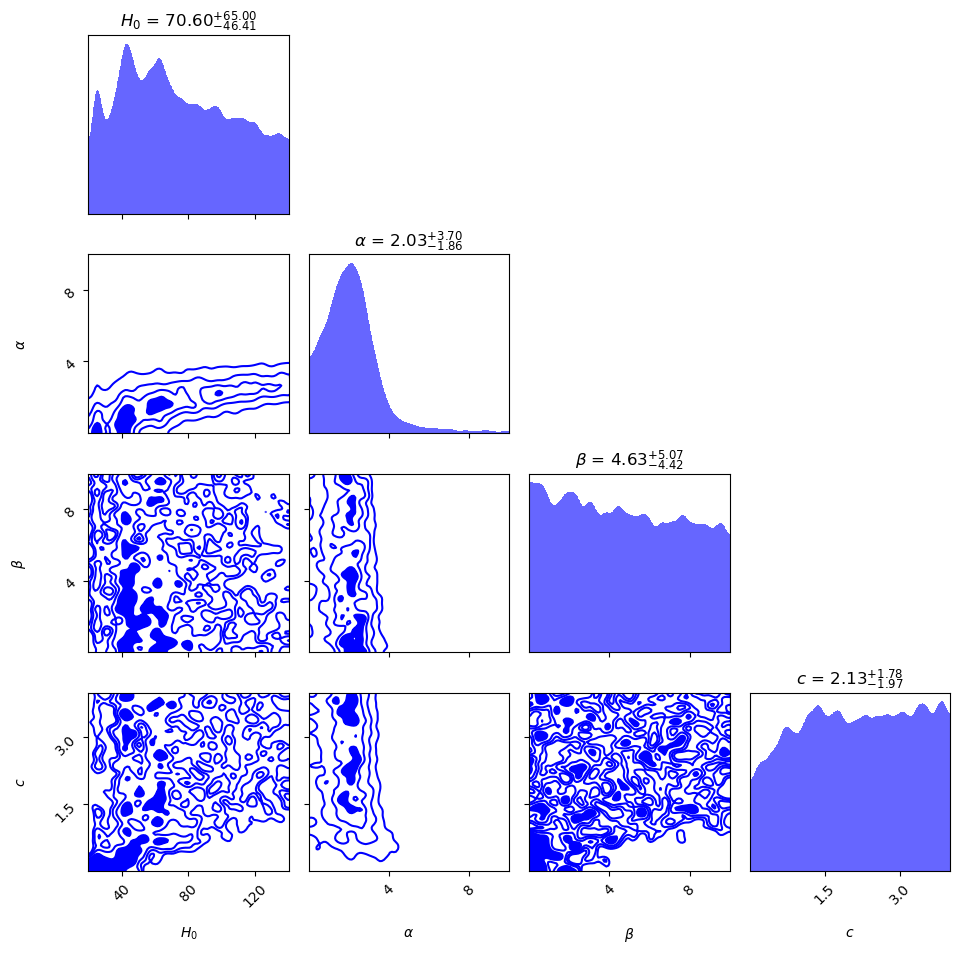

In [83]:
fig, axs = dyplot.cornerplot(results, color='blue',
                           truth_color='black', show_titles=True,
                           max_n_ticks=3, quantiles=None, labels=plot_labels)
fig.tight_layout()